例題5-1
=====
『Rによる計量経済学』第5章「自己相関」における例題5.1のPythonコードです。  
テキスト付属データセット「k0501.csv」ファイルを各自で出版社サイトよりダウンロードしてください。

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import pyper as pr
import matplotlib.pyplot as plt

データを読み込みます。

In [3]:
data = pd.read_csv('example/k0501.csv')

Rへデータを渡します。

In [4]:
r = pr.R(use_pandas =True)
r.assign('data1', data)

Rのコマンドを実行します。  
ここではsummary()を使って回帰分析の結果と、dwtest()を使ってダービン＝ワトソン統計量による自己相関の有無の仮説検定を表示します。  
なお、dwtest()はlmtestを予めRでインストールしてインポートしておかなければ上手く動かないようです。Rstudioを開き、Tools -> Install Packages で開かれた画面のPackagesの欄に「lmtest」と入力してInstallボタンをクリックすれば正常にインストールされます。

In [5]:
r(' library(lmtest)  ')
r('fm <- lm(Y ~ X, data=data1)')
print r('summary(fm)')
print r('dwtest(fm)')

try({summary(fm)})

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3212 -0.2682 -0.1515  0.5833  0.8485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53333    0.48011   1.111    0.299    
X            0.95758    0.07738  12.376 1.69e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7028 on 8 degrees of freedom
Multiple R-squared:  0.9504,	Adjusted R-squared:  0.9442 
F-statistic: 153.2 on 1 and 8 DF,  p-value: 1.695e-06


try({dwtest(fm)})

	Durbin-Watson test

data:  fm
DW = 2.0286, p-value = 0.3552
alternative hypothesis: true autocorrelation is greater than 0




最後にデータをPython側にとってきて、散布図と回帰直線を描きます。

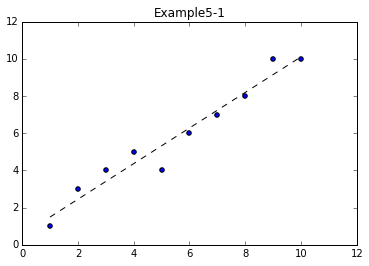

In [6]:
fm = r.get('fm$fitted.values')
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], fm, 'k--')
plt.title('Example5-1')